In [1]:
import sys
sys.path.append('/home/rlab/raghavendra/ddm_data/fit_each_condn')

import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pickle

# plot gamma vs ILD from each cond fit and from vbmc fit

In [2]:
all_ABL = [20, 40, 60]
all_ILD_sorted = np.sort([1, -1, 2, -2, 4, -4, 8, -8, 16, -16])
chi = 17.37
n_ABL = len(all_ABL)
n_ILD = len(all_ILD_sorted)

In [3]:
# ALL FIT 
with open('fit_all_phi_norm_and_time_vary.pkl', 'rb') as f:
    vp = pickle.load(f).vp

vp_samples = vp.sample(int(1e5))[0]
rate_lambda = vp_samples[:, 0].mean()
T_0 = vp_samples[:, 1].mean()
theta_E = vp_samples[:, 2].mean()
w = vp_samples[:, 3].mean()
Z_E = (w - 0.5) * 2 * theta_E
t_E_aff = vp_samples[:, 4].mean()
rate_norm_l = vp_samples[:, 5].mean()
bump_height = vp_samples[:, 6].mean()
bump_width = vp_samples[:, 7].mean()
dip_height = vp_samples[:, 8].mean()
dip_width = vp_samples[:, 9].mean()

In [4]:
rate_lambda, theta_E

(2.2583757888997082, 2.284339426300363)

# Adjustments to params

In [5]:
# rate_lambda = 0.12
# theta_E = 33.7

# gamma vs ILD

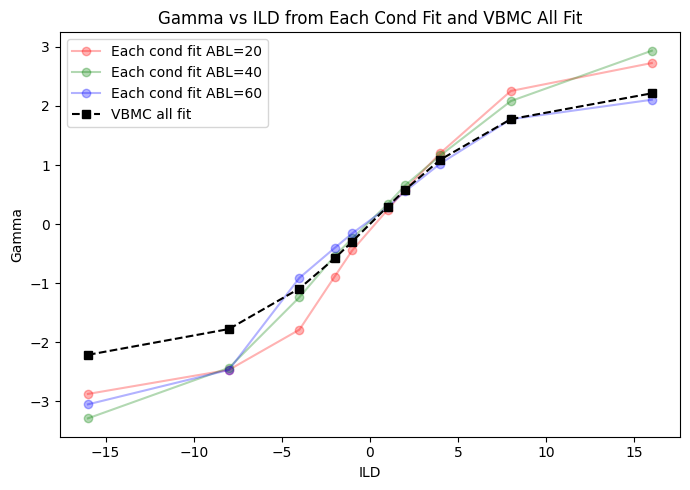

In [6]:


########## EACH COND ############
plot_type = 'mean'  # or 'median'
gamma_vs_ILD = np.zeros((n_ABL, n_ILD))
for a_idx, abl in enumerate(all_ABL):
    for i_idx, ILD in enumerate(all_ILD_sorted):
        pkl_file = os.path.join('/home/rlab/raghavendra/ddm_data/fit_each_condn/each_cond_data_apr', f"vbmc_T_vary_only_height_single_condn_ABL_{abl}_ILD_{ILD}.pkl")
        with open(pkl_file, 'rb') as f:
            vp = pickle.load(f)

        vp = vp.vp
        vp_samples = vp.sample(int(1e5))[0]

        if plot_type == 'mean':
            gamma_vs_ILD[a_idx, i_idx] = vp_samples[:, 0].mean()
        elif plot_type == 'median':
            gamma_vs_ILD[a_idx, i_idx] = np.median(vp_samples[:, 0])


fig, ax = plt.subplots(figsize=(7, 5))
colors = ['r', 'g', 'b']  # Red for first, Green for second, Blue for third ABL

for a_idx, abl in enumerate(all_ABL):
    ax.plot(
        all_ILD_sorted,
        gamma_vs_ILD[a_idx, :],
        label=f'Each cond fit ABL={abl}',
        marker='o',
        color=colors[a_idx],
        alpha=0.3
    )


ax.plot(all_ILD_sorted, theta_E * np.tanh(rate_lambda * all_ILD_sorted / chi), 
        label='VBMC all fit', color='k', ls='--', marker='s')

ax.set_title('Gamma vs ILD from Each Cond Fit and VBMC All Fit')
ax.set_xlabel('ILD')
ax.set_ylabel('Gamma')
ax.legend()
plt.tight_layout()
plt.show()

# gamma - norm, no norm

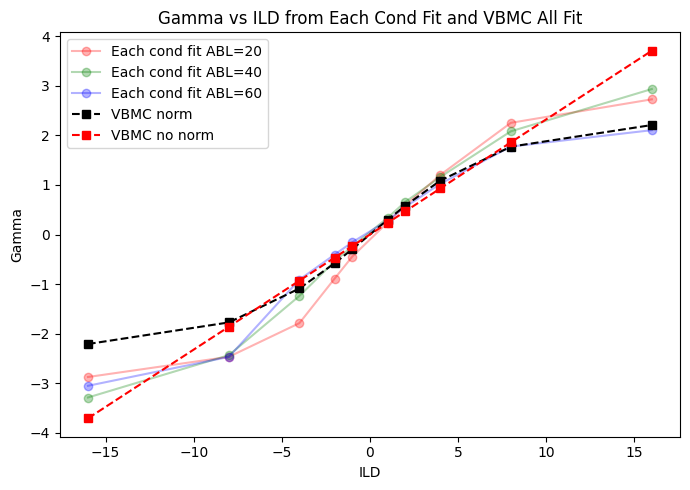

In [7]:
norm_params = {
    'rate_lambda': 2.258,
    'theta_E': 2.28
}

no_norm_params = {
    'rate_lambda': 0.12,
    'theta_E': 33.7
}


########## EACH COND ############
plot_type = 'mean'  # or 'median'
gamma_vs_ILD = np.zeros((n_ABL, n_ILD))
for a_idx, abl in enumerate(all_ABL):
    for i_idx, ILD in enumerate(all_ILD_sorted):
        pkl_file = os.path.join('/home/rlab/raghavendra/ddm_data/fit_each_condn/each_cond_data_apr', f"vbmc_T_vary_only_height_single_condn_ABL_{abl}_ILD_{ILD}.pkl")
        with open(pkl_file, 'rb') as f:
            vp = pickle.load(f)

        vp = vp.vp
        vp_samples = vp.sample(int(1e5))[0]

        if plot_type == 'mean':
            gamma_vs_ILD[a_idx, i_idx] = vp_samples[:, 0].mean()
        elif plot_type == 'median':
            gamma_vs_ILD[a_idx, i_idx] = np.median(vp_samples[:, 0])


fig, ax = plt.subplots(figsize=(7, 5))
colors = ['r', 'g', 'b']  # Red for first, Green for second, Blue for third ABL

for a_idx, abl in enumerate(all_ABL):
    ax.plot(
        all_ILD_sorted,
        gamma_vs_ILD[a_idx, :],
        label=f'Each cond fit ABL={abl}',
        marker='o',
        color=colors[a_idx],
        alpha=0.3
    )


ax.plot(all_ILD_sorted, norm_params['theta_E'] * np.tanh(norm_params['rate_lambda'] * all_ILD_sorted / chi), 
        label='VBMC norm', color='k', ls='--', marker='s')
ax.plot(all_ILD_sorted, no_norm_params['theta_E'] * np.tanh(no_norm_params['rate_lambda'] * all_ILD_sorted / chi), 
        label='VBMC no norm', color='r', ls='--', marker='s')

ax.set_title('Gamma vs ILD from Each Cond Fit and VBMC All Fit')
ax.set_xlabel('ILD')
ax.set_ylabel('Gamma')
ax.legend()
plt.tight_layout()
plt.show()

# omega

In [7]:
def calc_omega(ABL, ILD):
    cosh_ratio = np.cosh(rate_lambda * ILD / chi)/np.cosh(rate_lambda * rate_norm_l * ILD / chi)
    omega = ( 1/(T_0 * (theta_E**2)) ) * (10 ** ( (rate_lambda * (1 - rate_norm_l) * ABL) / 20 ) ) * cosh_ratio
    return omega


Text(0.5, 1.0, 'Omega vs ILD')

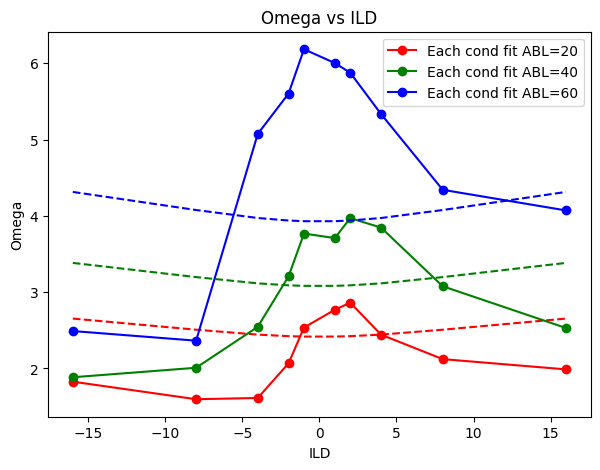

In [8]:
########## EACH COND ############
plot_type = 'mean'  # or 'median'
omega_vs_ILD = np.zeros((n_ABL, n_ILD))
for a_idx, abl in enumerate(all_ABL):
    for i_idx, ILD in enumerate(all_ILD_sorted):
        pkl_file = os.path.join('/home/rlab/raghavendra/ddm_data/fit_each_condn/each_cond_data_apr', f"vbmc_T_vary_only_height_single_condn_ABL_{abl}_ILD_{ILD}.pkl")
        with open(pkl_file, 'rb') as f:
            vp = pickle.load(f)

        vp = vp.vp
        vp_samples = vp.sample(int(1e5))[0]

        if plot_type == 'mean':
            omega_vs_ILD[a_idx, i_idx] = vp_samples[:, 1].mean()
        elif plot_type == 'median':
            omega_vs_ILD[a_idx, i_idx] = np.median(vp_samples[:, 1])



fig, ax = plt.subplots(figsize=(7, 5))
colors = ['r', 'g', 'b']  # Red for first, Green for second, Blue for third ABL

for a_idx, abl in enumerate(all_ABL):
    ax.plot(
        all_ILD_sorted,
        omega_vs_ILD[a_idx, :],
        label=f'Each cond fit ABL={abl}',
        marker='o',
        color=colors[a_idx]
    )

    ax.plot(
        all_ILD_sorted,
        np.array([calc_omega(abl, ild) for ild in all_ILD_sorted]),
        color=colors[a_idx],
        linestyle='--'
    )


ax.legend()
ax.set_xlabel('ILD')
ax.set_ylabel('Omega')
ax.set_title('Omega vs ILD')


##
# cosh_ratio = np.cosh(rate_lambda * ILD / chi)/np.cosh(rate_lambda * rate_norm_l * ILD / chi)
# omega = ( 1/(T0 * (theta_E**2)) ) * (10 ** ( (rate_lambda * (1 - rate_norm_l) * ABL) / 20 ) ) * cosh_ratio


# find T0


Fitting using curve_fit:
x_data (ABLs): [20, 40, 60]
y_data (Mean Omegas): [2.18323944 3.05512221 4.73416216]

Curve_fit successful!
Best fit T0: 0.0005
Estimated standard error on T0: 0.0000

Model predictions at data points:
ABL=20: Data Mean Omega=2.183, Model Omega=2.51e+00
ABL=40: Data Mean Omega=3.055, Model Omega=3.31e+00
ABL=60: Data Mean Omega=4.734, Model Omega=4.36e+00


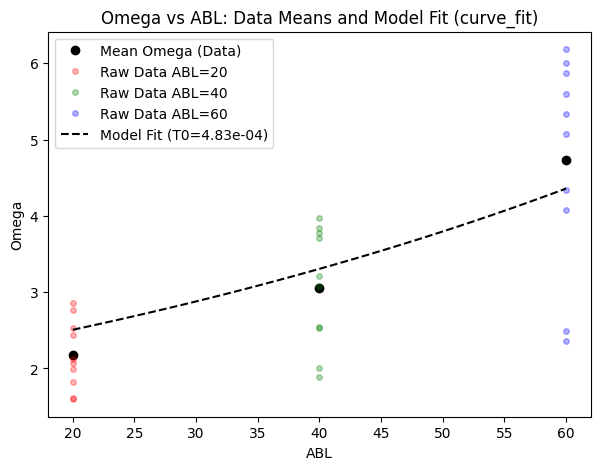

In [105]:
all_ABL = [20, 40, 60]
all_ILD_sorted = np.sort([1, -1, 2, -2, 4, -4, 8, -8, 16, -16])
chi = 17.37
n_ABL = len(all_ABL)
n_ILD = len(all_ILD_sorted)

########## EACH COND ############
plot_type = 'mean'  # or 'median'
omega_vs_ILD = np.zeros((n_ABL, n_ILD))
for a_idx, abl in enumerate(all_ABL):
    for i_idx, ILD in enumerate(all_ILD_sorted):
        pkl_file = os.path.join('/home/rlab/raghavendra/ddm_data/fit_each_condn/each_cond_data_apr', f"vbmc_T_vary_only_height_single_condn_ABL_{abl}_ILD_{ILD}.pkl")
        with open(pkl_file, 'rb') as f:
            vp = pickle.load(f)

        vp = vp.vp
        vp_samples = vp.sample(int(1e5))[0]

        if plot_type == 'mean':
            omega_vs_ILD[a_idx, i_idx] = vp_samples[:, 1].mean()
        elif plot_type == 'median':
            omega_vs_ILD[a_idx, i_idx] = np.median(vp_samples[:, 1])



rate_lambda = 0.12
theta_E = 33

# --- Optimization ---
from scipy.optimize import curve_fit

def omega_model_curvefit(abl_values, T0):
    """
    Model function for curve_fit.
    Calculates omega based on ABL and the parameter T0.
    Uses global constants rate_lambda and theta_E.
    """
    # Ensure T0 is positive during optimization if using bounds.
    # curve_fit handles bounds separately, so basic calculation here.
    if T0 <= 0:
        return np.inf # Return infinity for invalid T0
    factor = 10**(rate_lambda * np.array(abl_values) / 20)
    return (1 / (T0 * theta_E**2)) * factor


x_data = all_ABL # Independent variable: ABL levels
y_data = np.mean(omega_vs_ILD, axis=1) # Dependent variable: Mean omega for each ABL

print(f"\nFitting using curve_fit:")
print(f"x_data (ABLs): {x_data}")
print(f"y_data (Mean Omegas): {y_data}")

initial_guess_T0 = [2.5 * 1e-4]  # Start with T0=1.0
bounds_T0 = ([1*1e-4], [9*1e-4]) # Bounds: (lower bounds for params), (upper bounds for params)


try:
    # popt: Optimal values for the parameters (T0 in this case)
    # pcov: Estimated covariance of popt. The diagonals provide the variance of the parameter estimate.
    popt, pcov = curve_fit(
        omega_model_curvefit,
        x_data,
        y_data,
        p0=initial_guess_T0,
        bounds=bounds_T0
    )

    best_T0_curvefit = popt[0]
    # Standard deviation error on the parameter T0
    perr = np.sqrt(np.diag(pcov))
    stderr_T0 = perr[0]

    print(f"\nCurve_fit successful!")
    print(f"Best fit T0: {best_T0_curvefit:.4f}")
    print(f"Estimated standard error on T0: {stderr_T0:.4f}")

except RuntimeError as e:
    print(f"\nCurve_fit failed: {e}")
    best_T0_curvefit = None
except ValueError as e:
    print(f"\nCurve_fit failed (likely bounds or initial guess issue): {e}")
    best_T0_curvefit = None


# --- Plotting the results ---
fig, ax = plt.subplots(figsize=(7, 5))
colors = ['r', 'g', 'b']

# Plot original data (mean points used for fit)
ax.plot(
    x_data, # ABL values
    y_data, # Mean Omega values
    'ko',        # Black circles for the mean points
    label='Mean Omega (Data)'
)

# Plot original data (individual points)
for a_idx, abl in enumerate(all_ABL):
     ax.plot(
        np.full(n_ILD, abl), # Plot vs ABL
        omega_vs_ILD[a_idx, :],
        'o', # Use dots for individual points
        color=colors[a_idx],
        alpha=0.3, # Make them lighter
        markersize=4,
        label=f'Raw Data ABL={abl}' if n_ILD < 15 else None # Avoid too many labels
     )


# Plot model predictions using the best T0 from curve_fit
if best_T0_curvefit is not None:
    # Generate smooth line for the model prediction across ABL range
    abl_fit_line = np.linspace(min(all_ABL), max(all_ABL), 100)
    omega_fit_line = omega_model_curvefit(abl_fit_line, best_T0_curvefit)

    ax.plot(
        abl_fit_line,
        omega_fit_line,
        'k--', # Black dashed line for the fit
        label=f'Model Fit (T0={best_T0_curvefit:.2e})'
    )

    # Optionally print model prediction at specific ABL points:
    print("\nModel predictions at data points:")
    for i, abl in enumerate(x_data):
        model_pred = omega_model_curvefit(abl, best_T0_curvefit)
        print(f"ABL={abl}: Data Mean Omega={y_data[i]:.3f}, Model Omega={model_pred:.2e}")


# Adjust plot for ABL on x-axis
ax.set_xlabel('ABL')
ax.set_ylabel('Omega')
ax.set_title(f'Omega vs ABL: Data Means and Model Fit (curve_fit)')
ax.legend()
# ax.set_ylim(0, 5)


In [104]:
best_T0_curvefit * 1000

0.27374842245314707

<>:46: SyntaxWarning: invalid escape sequence '\o'
<>:52: SyntaxWarning: invalid escape sequence '\o'
<>:46: SyntaxWarning: invalid escape sequence '\o'
<>:52: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_1023769/24156581.py:46: SyntaxWarning: invalid escape sequence '\o'
  label='Mean $\omega$' # Label for mean line
/tmp/ipykernel_1023769/24156581.py:52: SyntaxWarning: invalid escape sequence '\o'
  plt.ylabel('Omega ($\omega$)')


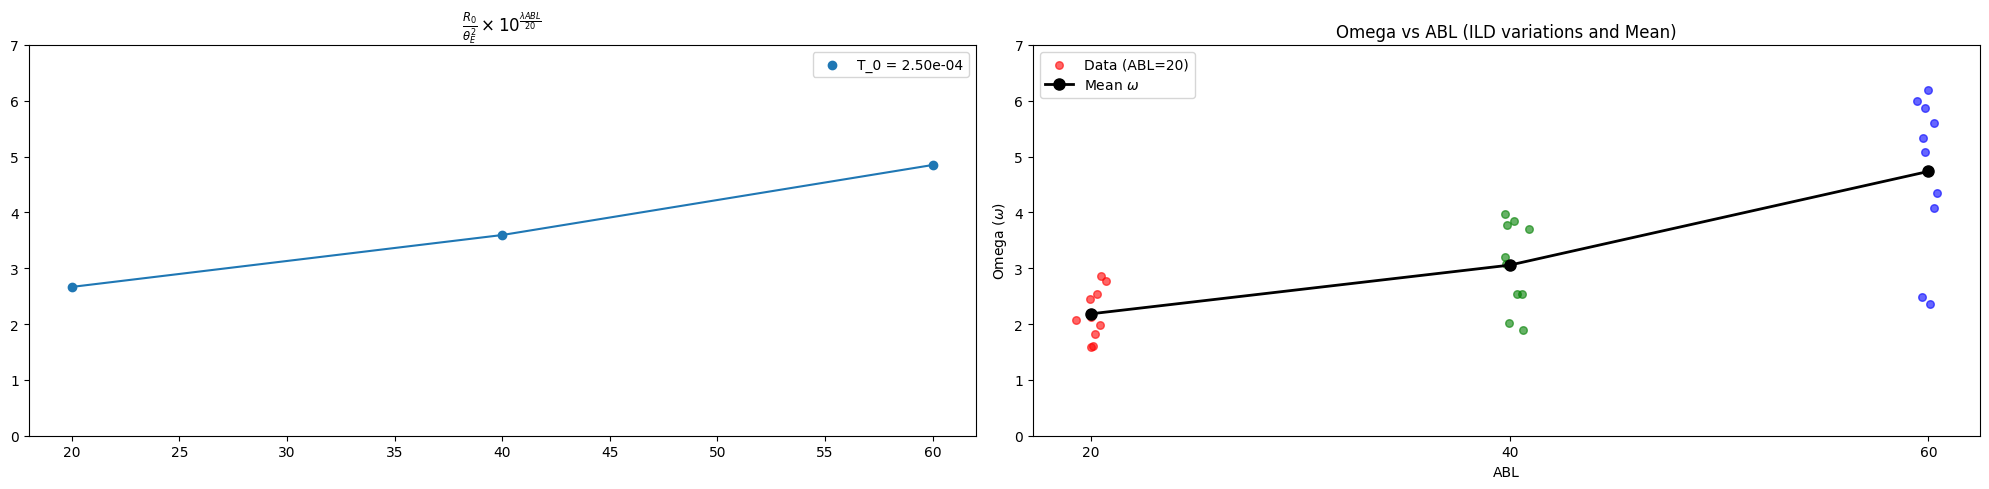

In [89]:
rate_lambda = 0.13
theta_E = 45
T_0 = 25 * 1e-5
T0_omega = (1/(T_0 * (theta_E**2))) *  ( 10**(rate_lambda * np.array(all_ABL) / 20) )

plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.scatter(all_ABL, T0_omega, label=f'T_0 = {format(T_0, ".2e")}')
plt.plot(all_ABL, T0_omega)

plt.title(r'$\frac{R_0}{\theta_E^2} \times 10^{\frac{\lambda ABL}{20}}$')
plt.ylim(0, 7)

plt.legend()

plt.subplot(1,2,2)
colors = ['r', 'g', 'b'] # Colors for different ABL levels in scatter

# Plot individual data points (scattered vertically at each ABL)
for a_idx, abl in enumerate(all_ABL):
    x_coords = np.full(n_ILD, abl)
    # Add jitter
    jitter_strength = 0.5
    x_coords_jittered = x_coords + np.random.randn(n_ILD) * jitter_strength
    y_coords = omega_vs_ILD[a_idx, :]

    plt.scatter(
        x_coords_jittered,
        y_coords,
        color=colors[a_idx],
        alpha=0.6,
        label=f'Data (ABL={abl})' if a_idx == 0 else "_nolegend_", # Label only one scatter set
        s=30
    )

# Plot the line connecting the mean values
plt.plot(
    all_ABL,
    mean_omega_per_ABL,
    marker='o',
    markersize=8,
    linestyle='-',
    linewidth=2,
    color='k', # Black line for mean
    label='Mean $\omega$' # Label for mean line
)
plt.ylim(0, 7)

# Enhance the second subplot
plt.xlabel('ABL')
plt.ylabel('Omega ($\omega$)')
plt.title('Omega vs ABL (ILD variations and Mean)')
plt.xticks(all_ABL) # Ensure ticks are at ABL values
plt.legend()


# --- Final Adjustments ---
plt.tight_layout() # Adjust spacing between subplots
plt.show()


Text(0.5, 0, 'ABL')

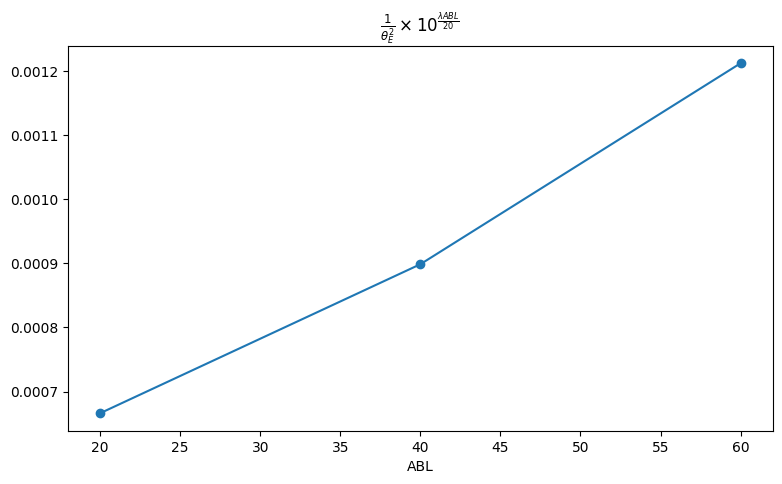

In [99]:
rate_lambda = 0.13
theta_E = 45
T_0 = 1
T0_omega = (1/(T_0 * (theta_E**2))) *  ( 10**(rate_lambda * np.array(all_ABL) / 20) )

plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.scatter(all_ABL, T0_omega, label=f'T_0 = {format(T_0, ".2e")}')
plt.plot(all_ABL, T0_omega)
plt.title(r'$\frac{1}{\theta_E^2} \times 10^{\frac{\lambda ABL}{20}}$')
plt.xlabel('ABL')



# gamma 

In [ ]:
rate_lambda = 0.12
theta_E = 33.7

